In [9]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from datetime import datetime

In [10]:
# Which patterns are adopted at the same time?
projects_size = 5
patterns = ["contribution_guidelines", "cookbook_and_recipes", "customization_points", "design_internals", "documentation_roadmap", "documentation_versioning", "framework_overview", "graded_examples", "migration_handbook", "multi_language_support"]

with open("../../data/misc/adoption.json") as adoption_file:
    adoption = json.load(adoption_file)
    
    for pattern in patterns:
        mean = {"contribution_guidelines": 0, "cookbook_and_recipes": 0, "customization_points": 0, "design_internals": 0, "documentation_roadmap": 0, "documentation_versioning": 0, "framework_overview": 0, "graded_examples": 0, "migration_handbook": 0, "multi_language_support": 0}

        for project in adoption:
            adopted_date = adoption[project][pattern]
            for adopted_pattern in adoption[project]:
                if adoption[project][adopted_pattern] == adopted_date:
                    mean[adopted_pattern] += 1
        
        print(f"{pattern} = {[mean[pt]/projects_size for pt in mean]}")

contribution_guidelines = [1.0, 0.2, 0.4, 0.4, 0.4, 0.0, 0.4, 0.2, 0.0, 0.0]
cookbook_and_recipes = [0.2, 1.0, 0.2, 0.4, 0.2, 0.0, 0.2, 0.4, 0.0, 0.0]
customization_points = [0.4, 0.2, 1.0, 0.8, 0.8, 0.0, 0.8, 0.6, 0.0, 0.0]
design_internals = [0.4, 0.4, 0.8, 1.0, 0.8, 0.0, 0.8, 0.8, 0.0, 0.0]
documentation_roadmap = [0.4, 0.2, 0.8, 0.8, 1.0, 0.0, 1.0, 0.6, 0.0, 0.0]
documentation_versioning = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2, 0.2]
framework_overview = [0.4, 0.2, 0.8, 0.8, 1.0, 0.0, 1.0, 0.6, 0.0, 0.0]
graded_examples = [0.2, 0.4, 0.6, 0.8, 0.6, 0.0, 0.6, 1.0, 0.0, 0.0]
migration_handbook = [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 1.0, 0.0]
multi_language_support = [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 1.0]


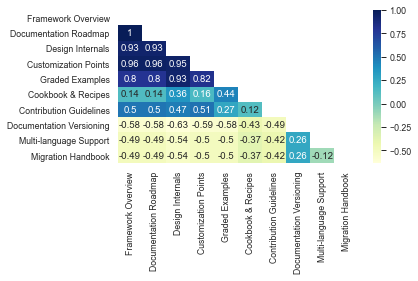

In [11]:
contribution_guidelines = [1.0, 0.2, 0.4, 0.4, 0.4, 0.0, 0.4, 0.2, 0.0, 0.0]
cookbook_and_recipes = [0.2, 1.0, 0.2, 0.4, 0.2, 0.0, 0.2, 0.4, 0.0, 0.0]
customization_points = [0.4, 0.2, 1.0, 0.8, 0.8, 0.0, 0.8, 0.6, 0.0, 0.0]
design_internals = [0.4, 0.4, 0.8, 1.0, 0.8, 0.0, 0.8, 0.8, 0.0, 0.0]
documentation_roadmap = [0.4, 0.2, 0.8, 0.8, 1.0, 0.0, 1.0, 0.6, 0.0, 0.0]
documentation_versioning = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2, 0.2]
framework_overview = [0.4, 0.2, 0.8, 0.8, 1.0, 0.0, 1.0, 0.6, 0.0, 0.0]
graded_examples = [0.2, 0.4, 0.6, 0.8, 0.6, 0.0, 0.6, 1.0, 0.0, 0.0]
migration_handbook = [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 1.0, 0.0]
multi_language_support = [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 1.0]

df = pd.DataFrame({
    "Framework Overview": framework_overview, 
    "Documentation Roadmap": documentation_roadmap, 
    "Design Internals": design_internals, 
    "Customization Points": customization_points, 
    "Graded Examples": graded_examples, 
    "Cookbook & Recipes": cookbook_and_recipes, 
    "Contribution Guidelines": contribution_guidelines, 
    "Documentation Versioning": documentation_versioning, 
    "Multi-language Support": multi_language_support,
    "Migration Handbook": migration_handbook, 
})

df_corr = df.corr()

mask = np.triu(np.ones(df_corr.shape)).astype(bool)

sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif')
g = sns.heatmap(df_corr, mask=mask, annot=True, cmap="YlGnBu")

g.figure.tight_layout()
g.figure.savefig(f'../../figures/pattern_adoption/correlation_simultaneous_existence.pdf', format='pdf', bbox_inches="tight")